# 0. Préparation

In [ ]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from datetime import datetime

In [ ]:
CHEMIN = 'drive/My Drive/Colab Notebooks/ocr_data_scientist/P3 Application alimentation/'
FILENAME = 'en.openfoodfacts.org.products.csv'

In [ ]:
main_df = pd.read_csv(CHEMIN + FILENAME, sep='\t')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,12,18,19,20,21,25,26,27,29,50,62,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Découverte

### 1.1 Premières explorations

In [ ]:
main_df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486047 entries, 0 to 1486046
Columns: 182 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(58)
memory usage: 2.0+ GB


Suppression des colonnes entièrement vides (14 colonnes au total)

In [ ]:
def delete_nan_columns(dataframe_):
    """Function that returns the dataframe without the columns that contain
    only Nan values"""
    # Check if the argument is a pandas dataframe
    if type(dataframe_) == type(pd.DataFrame({})):
        for column in dataframe_.columns:
            if dataframe_[column].isna().sum() == dataframe_.shape[0]:
                dataframe_ = dataframe_.drop([column], axis=1)
        return dataframe_
    else:
        print('TypeError: The argument must be a pandas DataFrame.')

In [ ]:
main_df = delete_nan_columns(main_df)

### 1.2 Liste des colonnes que nous sommes sûrs d'éliminer

In [ ]:
delete_list = ['states_en',
 'biotin_100g',
 '-cerotic-acid_100g',
 'iodine_100g',
 'quantity',
 'image_ingredients_url',
 'caffeine_100g',
 'states',
 '-insoluble-fiber_100g',
 'ph_100g',
 'energy-from-fat_100g',
 'vitamin-d_100g',
 'brands_tags',
 'states_tags',
 '-capric-acid_100g',
 'casein_100g',
 'nova_group',
 'polyols_100g',
 'phylloquinone_100g',
 '-caproic-acid_100g',
 'polyunsaturated-fat_100g',
 'vitamin-k_100g',
 'omega-6-fat_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'main_category',
 'countries_en',
 'image_small_url',
 'taurine_100g',
 'nucleotides_100g',
 'calcium_100g',
 'folates_100g',
 'serving_size',
 '-glucose_100g',
 '-maltodextrins_100g',
 'pantothenic-acid_100g',
 'beta-glucan_100g',
 'packaging',
 'energy-kcal_100g',
 'starch_100g',
 '-arachidic-acid_100g',
 'first_packaging_code_geo',
 'energy-kj_100g',
 'fluoride_100g',
 '-linoleic-acid_100g',
 'energy_100g',
 '-behenic-acid_100g',
 'copper_100g',
 'vitamin-c_100g',
 'image_ingredients_small_url',
 'vitamin-b9_100g',
 'ingredients_from_palm_oil_tags',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 '-arachidonic-acid_100g',
 'beta-carotene_100g',
 'vitamin-a_100g',
 'potassium_100g',
 'chlorophyl_100g',
 '-gamma-linolenic-acid_100g',
 'fruits-vegetables-nuts-dried_100g',
 'molybdenum_100g',
 'nutriscore_grade',
 'main_category_en',
 'vitamin-b1_100g',
 'additives_n',
 '-oleic-acid_100g',
 '-maltose_100g',
 'inositol_100g',
 'choline_100g',
 'trans-fat_100g',
 'origins_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'created_t',
 'vitamin-e_100g',
 'emb_codes',
 'traces_tags',
 'pnns_groups_1',
 'serving_quantity',
 'salt_100g',
 'silica_100g',
 'omega-3-fat_100g',
 'serum-proteins_100g',
 '-lactose_100g',
 'traces',
 'phosphorus_100g',
 'fruits-vegetables-nuts_100g',
 'chloride_100g',
 'cocoa_100g',
 '-butyric-acid_100g',
 'proteins_100g',
 '-lauric-acid_100g',
 'carnitine_100g',
 'url',
 'nutrition-score-fr_100g',
 'collagen-meat-protein-ratio_100g',
 'bicarbonate_100g',
 'manufacturing_places_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'additives_tags',
 'omega-9-fat_100g',
 '-fructose_100g',
 '-myristic-acid_100g',
 'glycemic-index_100g',
 'brand_owner',
 '-alpha-linolenic-acid_100g',
 'carbohydrates_100g',
 'image_nutrition_url',
 'chromium_100g',
 'vitamin-b6_100g',
 'pnns_groups_2',
 'categories_en',
 'ingredients_from_palm_oil_n',
 'fat_100g',
 'emb_codes_tags',
 '-stearic-acid_100g',
 'image_url',
 'last_modified_t',
 'saturated-fat_100g',
 'categories_tags',
 'manganese_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'sodium_100g',
 'packaging_tags',
 'selenium_100g',
 'vitamin-b2_100g',
 '-sucrose_100g',
 'monounsaturated-fat_100g',
 'zinc_100g',
 '-soluble-fiber_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-montanic-acid_100g',
 'magnesium_100g',
 'nutrition-score-uk_100g',
 'vitamin-b12_100g',
 'image_nutrition_small_url',
 '-caprylic-acid_100g',
 'vitamin-pp_100g',
 'labels_tags',
 'nutriscore_score',
 '-palmitic-acid_100g']

Déduction de la liste des colonnes à garder. Prends en compte les éventuelles colonnes rajoutées postérieurement à la rédaction du programme.

In [ ]:
keep_list = list(set([column for column in main_df.columns]) - set(delete_list))

In [ ]:
explor_df = main_df[keep_list]
explor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486047 entries, 0 to 1486046
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   packaging_text          109 non-null      object 
 1   fiber_100g              450075 non-null   float64
 2   allergens               171863 non-null   object 
 3   additives_en            377436 non-null   object 
 4   cities_tags             68188 non-null    object 
 5   cholesterol_100g        267983 non-null   float64
 6   sugars_100g             1164219 non-null  float64
 7   generic_name            106163 non-null   object 
 8   labels_en               342120 non-null   object 
 9   countries_tags          1480934 non-null  object 
 10  last_modified_datetime  1486047 non-null  object 
 11  brands                  825174 non-null   object 
 12  created_datetime        1486047 non-null  object 
 13  code                    1486047 non-null  object 
 14  la

### 1.3 Affichage de la proportion de valeurs NaN dans chaque colonne

In [ ]:
def nan_per_column(dataframe_):
    """Fonction qui retourne le nombre de valeurs NaN par colonne."""
    # Check if the argument is a pandas dataframe
    if type(dataframe_) == type(pd.DataFrame({})):
        column_nans = {}
        for column in dataframe_.columns:
            column_nans[column] = dataframe_[column].isna().sum()
        column_nans_list = sorted(column_nans.items(), key=lambda item: item[1], reverse=False)
        categories = [element[0] for element in column_nans_list]
        values = [element[1]/dataframe_.shape[0]*100 for element in column_nans_list]
        plt.figure(figsize=(8, 8))
        plt.title('Proportion de valeurs NaN pour chaque colonne')
        ax = plt.axes()
        ax.xaxis.grid() # vertical lines
        plt.xlabel('% de valeurs NaN')
        plt.barh(categories, values, color='orange', edgecolor='k')
    else:
        print('TypeError: The argument must be a pandas DataFrame.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


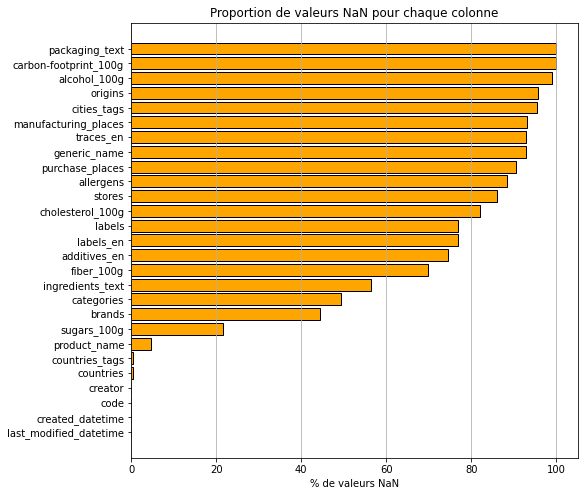

In [ ]:
nan_per_column(explor_df)